In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting style
plt.style.use("seaborn-v0_8-whitegrid")


In [2]:
# Load the dataset
df = pd.read_csv("../data/BrentOilPrices.csv")

# Show first few rows
df.head()


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [5]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)

# Sort by date (just in case)
df = df.sort_values('Date')

# Reset index
df.reset_index(drop=True, inplace=True)

# Check range
df['Date'].min(), df['Date'].max()


(Timestamp('1987-05-20 00:00:00'), Timestamp('2022-11-14 00:00:00'))

In [8]:
# Check basic info and missing values
df.info()
print("\nMissing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 9010 entries, 1 to 9010
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         9010 non-null   datetime64[ns]
 1   Price        9010 non-null   float64       
 2   Log_Returns  9010 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 281.6 KB

Missing values per column:
 Date           0
Price          0
Log_Returns    0
dtype: int64


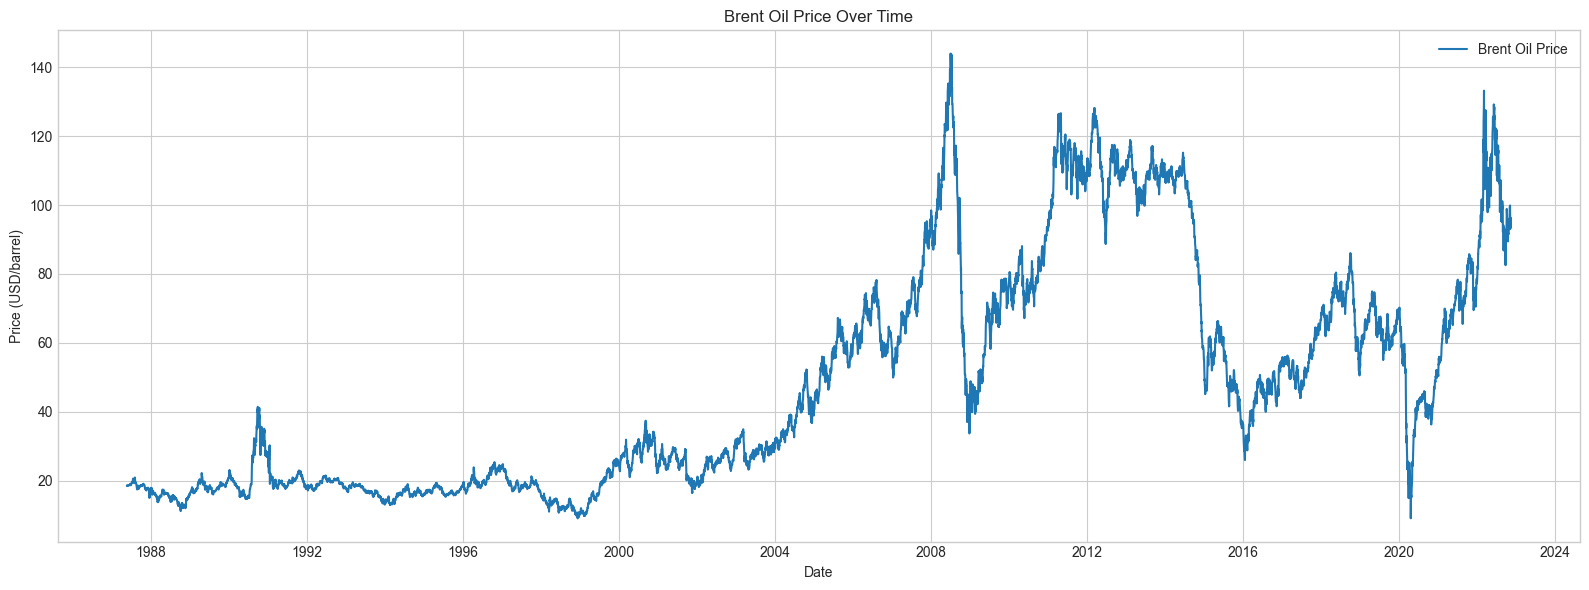

In [6]:
# Plot price over time
plt.figure(figsize=(16, 6))
plt.plot(df['Date'], df['Price'], label="Brent Oil Price")
plt.title("Brent Oil Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD/barrel)")
plt.legend()
plt.tight_layout()
plt.show()


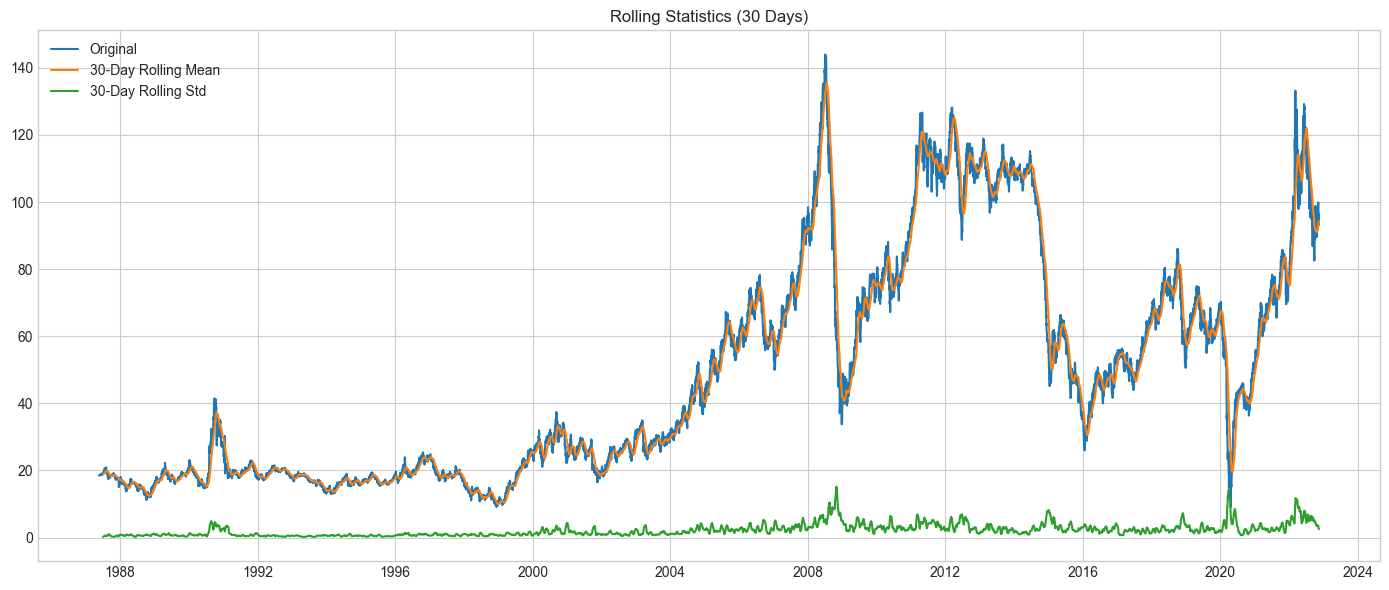

In [10]:
df['Rolling_Mean'] = df['Price'].rolling(window=30).mean()
df['Rolling_Std'] = df['Price'].rolling(window=30).std()

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Price'], label='Original')
plt.plot(df['Date'], df['Rolling_Mean'], label='30-Day Rolling Mean')
plt.plot(df['Date'], df['Rolling_Std'], label='30-Day Rolling Std')
plt.title('Rolling Statistics (30 Days)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# First-order differencing
df['Price_diff'] = df['Price'].diff()

# Drop the first NA
df_diff = df.dropna()

# Re-run the ADF test on the differenced series
result_diff = adfuller(df_diff['Price_diff'])
print('ADF Statistic (1st diff):', result_diff[0])
print('p-value:', result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print(f'   {key}: {value}')


ADF Statistic (1st diff): -15.503195789840326
p-value: 2.400859111703204e-28
Critical Values:
   1%: -3.4310806943814685
   5%: -2.8618629192880443
   10%: -2.566941884917854


In [12]:
# ADF Test for Stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Price'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

if result[1] < 0.05:
    print("\n✅ Series is likely stationary.")
else:
    print("\n❌ Series is likely non-stationary.")


ADF Statistic: -1.991854407129527
p-value: 0.29015603926422073
Critical Value (1%): -3.4310784153953295
Critical Value (5%): -2.8618619122481883
Critical Value (10%): -2.566941348864837

❌ Series is likely non-stationary.


<Figure size 1400x500 with 0 Axes>

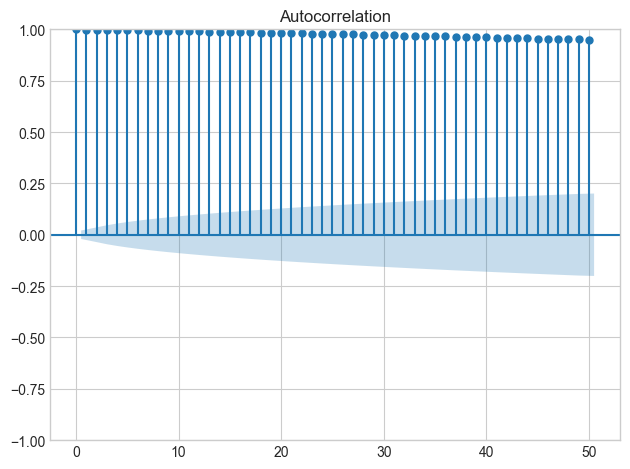

<Figure size 1400x500 with 0 Axes>

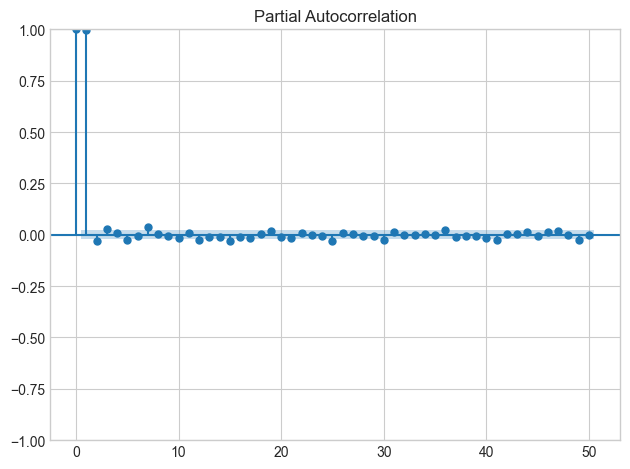

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 5))
plot_acf(df['Price'].dropna(), lags=50)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
plot_pacf(df['Price'].dropna(), lags=50, method='ywm')
plt.tight_layout()
plt.show()


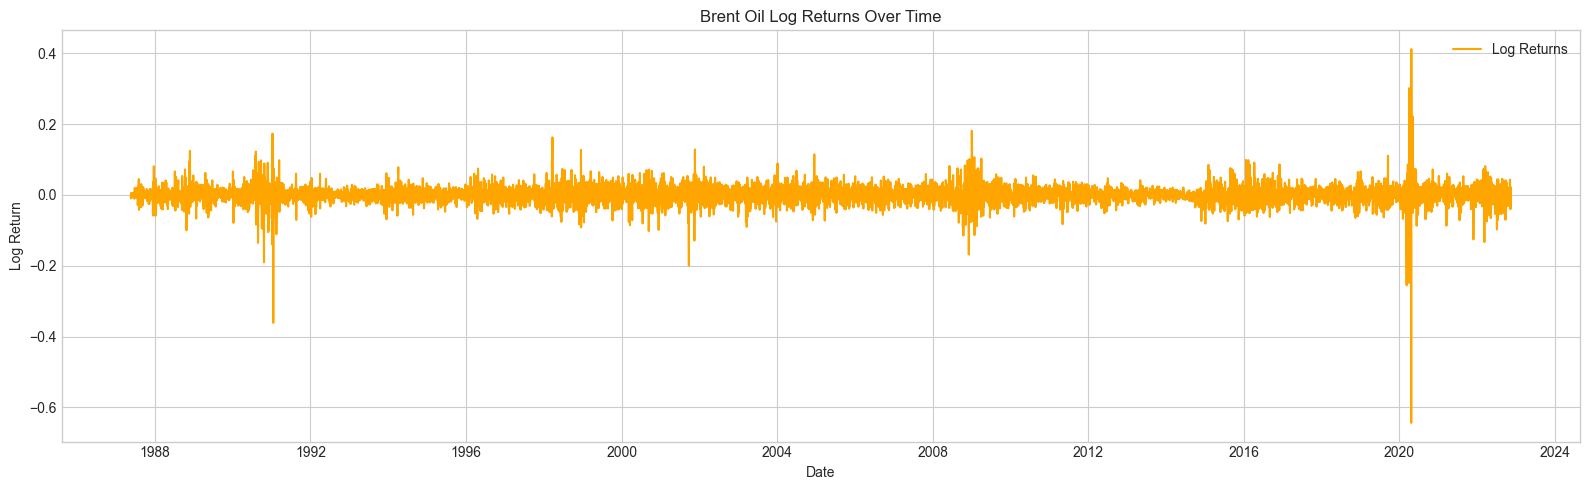

In [7]:
# Calculate log returns
df['Log_Returns'] = np.log(df['Price'] / df['Price'].shift(1))

# Drop NaN from first row
df.dropna(inplace=True)

# Plot log returns
plt.figure(figsize=(16, 5))
plt.plot(df['Date'], df['Log_Returns'], label="Log Returns", color='orange')
plt.title("Brent Oil Log Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.tight_layout()
plt.show()


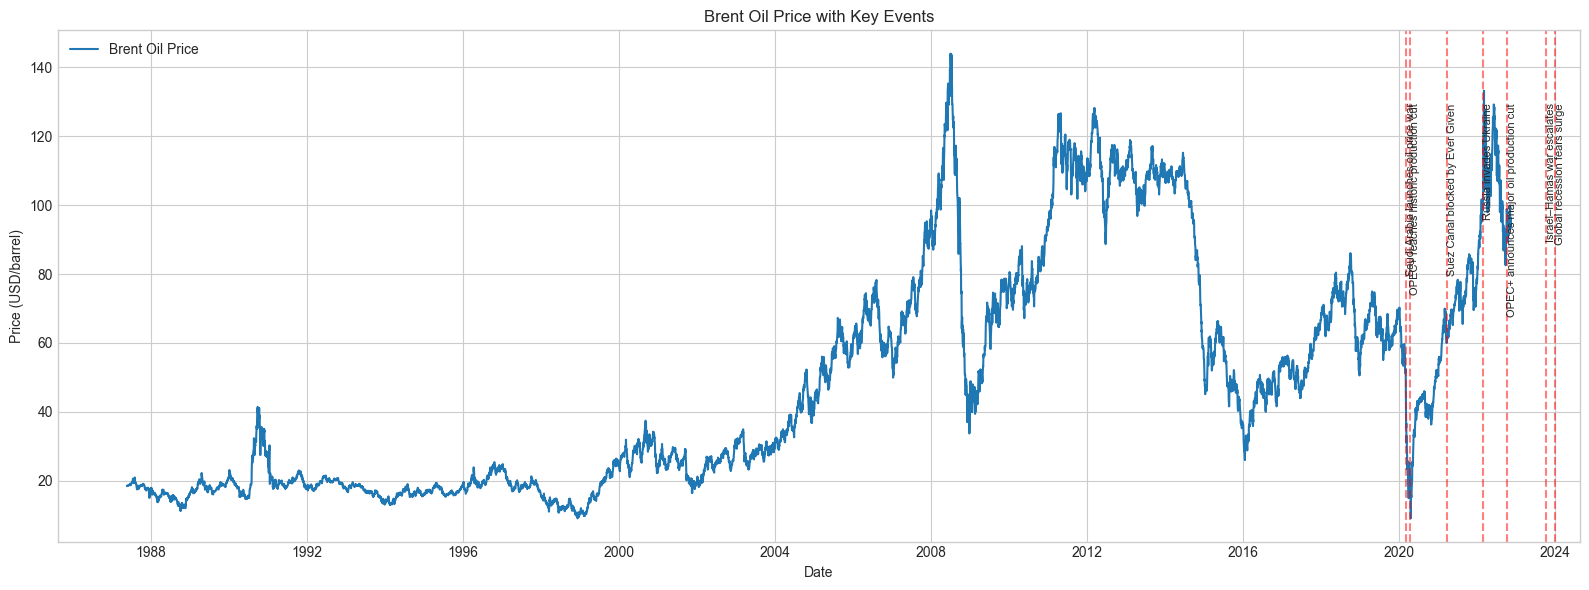

In [16]:
# Load events
df_events = pd.read_csv('../data/events.csv', parse_dates=['Date'])

# Map events onto price data
df['Event'] = df['Date'].map(df_events.set_index('Date')['Event'])

# Plot price with event markers
plt.figure(figsize=(16,6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price')
for _, row in df_events.iterrows():
    plt.axvline(x=row['Date'], color='red', linestyle='--', alpha=0.5)
    plt.text(row['Date'], df['Price'].max()*0.9, row['Event'], rotation=90, fontsize=8, verticalalignment='top')

plt.title('Brent Oil Price with Key Events')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.legend()
plt.tight_layout()
plt.show()
